In [ ]:
#Load the data set
import pandas as pd
df = pd.read_csv('/content/sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols



['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [ ]:
# Compute mean, median, mode, std deviation
for col in numerical_cols:
    print(f"Column: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")
    print("-" * 40)


Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926
----------------------------------------
Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645
----------------------------------------
Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328
----------------------------------------
Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511
----------------------------------------
Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985
----------------------------------------
Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934
----------------------------------------


These values show the central tendency and spread of each numerical feature. If the mean is significantly different from the median, it indicates skewness. A high standard deviation implies higher variability.


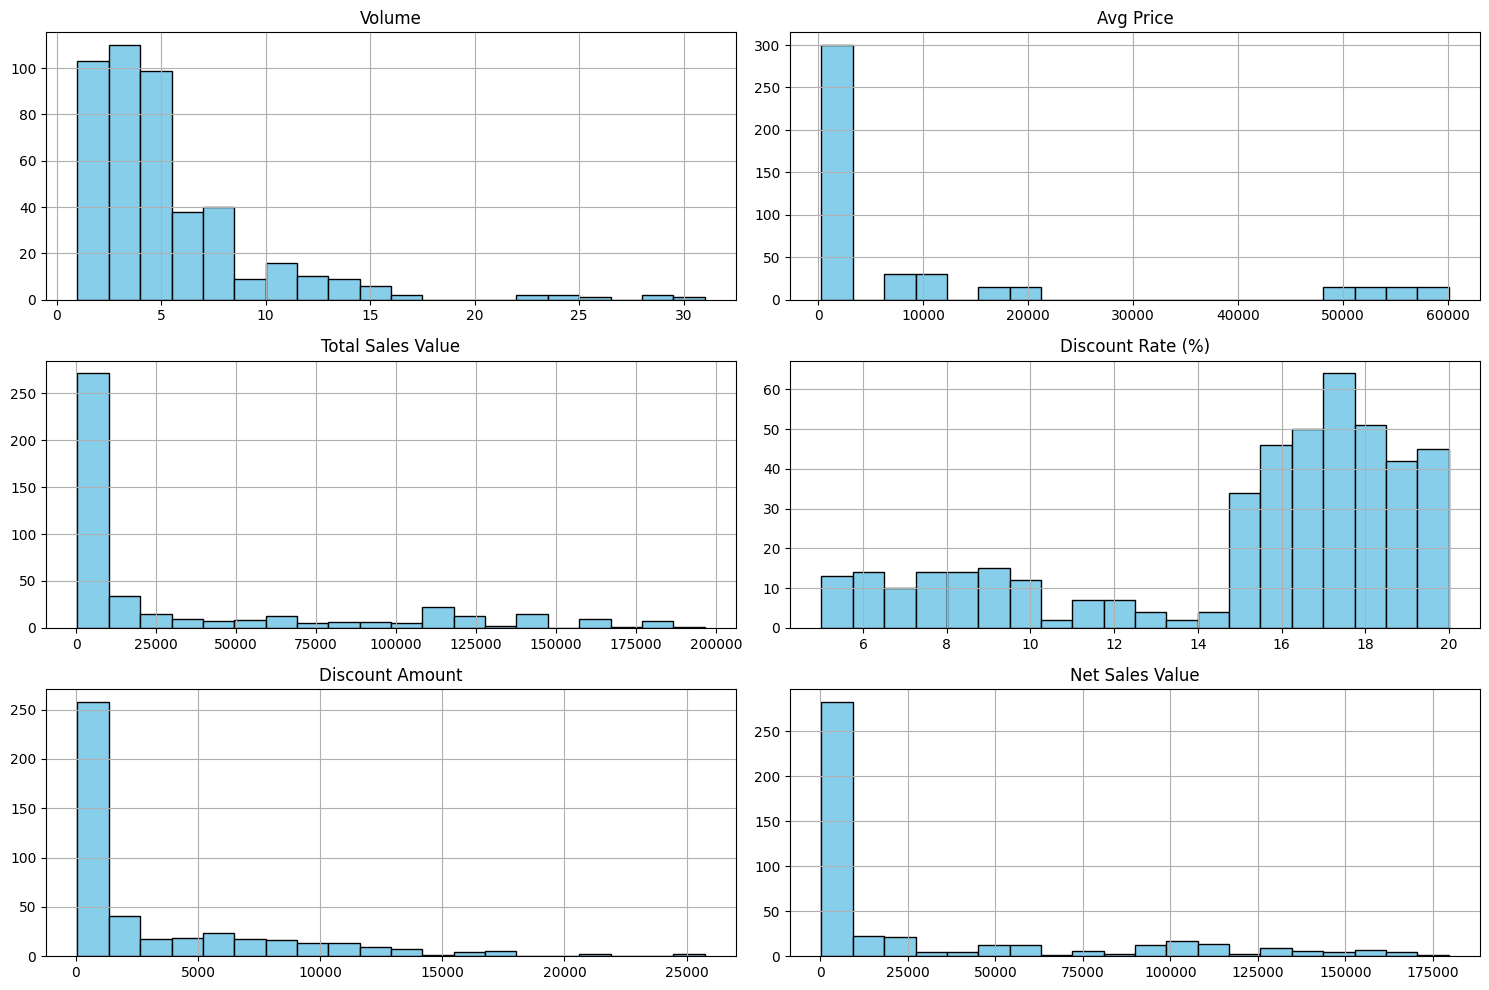

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
df[numerical_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


In [ ]:
#Most distributions are [left/right]-skewed

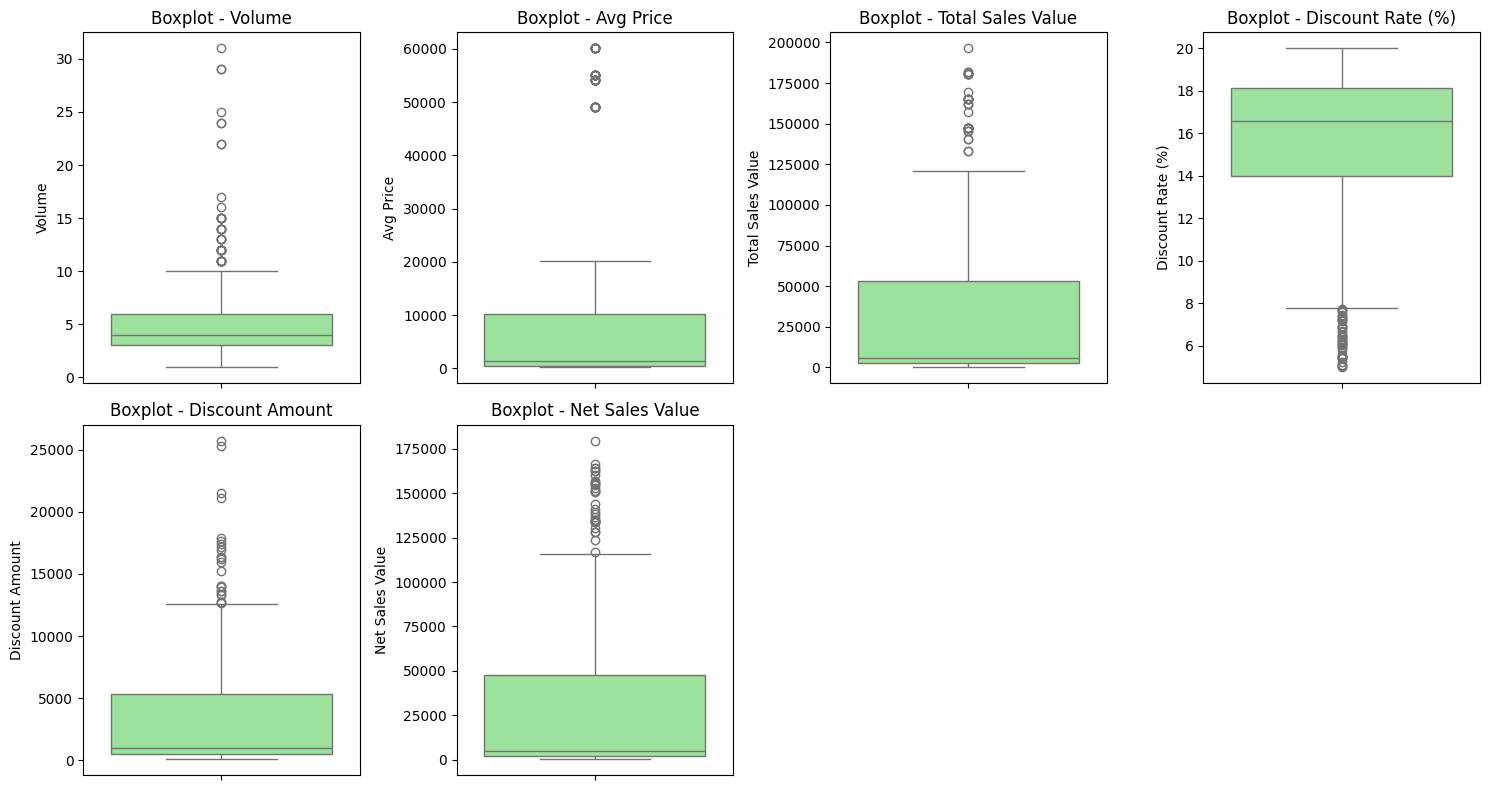

In [ ]:
# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols)//2 + 1, i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols


['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

<ipython-input-14-3338016583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-14-3338016583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-14-3338016583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-14-3338016583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

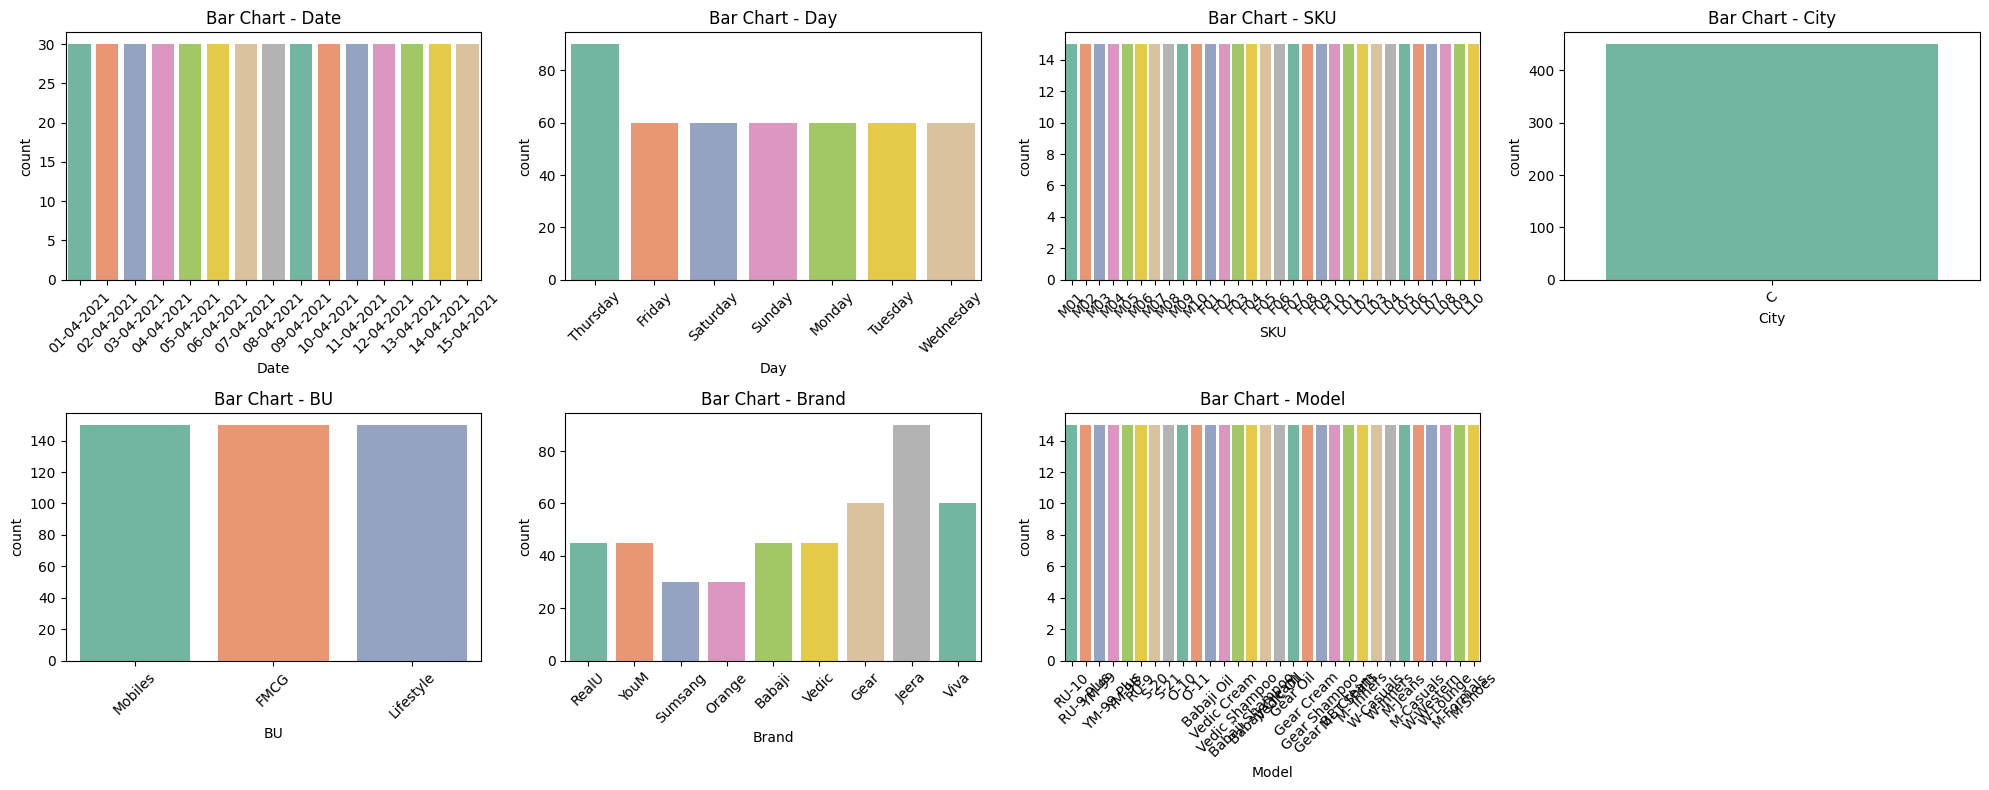

In [ ]:
# Bar charts
plt.figure(figsize=(20, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, len(categorical_cols)//2 + 1, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Bar Chart - {col}')
plt.tight_layout()
plt.show()


Z-score normalization centers data to mean 0 and scales to standard deviation 1. This is useful for algorithms sensitive to scale.

# What is Standardization (Z-score Normalization)?

Standardization is a data preprocessing technique used to rescale numerical features so that they have:

- **Mean (μ) = 0**
- **Standard Deviation (σ) = 1**

This is done using the **Z-score formula**:

\[
z = \frac{x - \mu}{\sigma}
\]

Where:
- `x` is the original value
- `μ` is the mean of the column
- `σ` is the standard deviation

---

#Why is Standardization Important?

- It **removes bias** due to different scales (e.g., price vs. discount).
- Many machine learning algorithms (like KNN, SVM, and PCA) perform better with standardized data.
- It ensures **equal contribution** of all numerical features in the model.

---

#  Example:
If one feature ranges from 0–1000 (e.g., Sales) and another from 0–10 (e.g., Discount), models may prioritize the larger-range feature unless we standardize them.


In [ ]:
# Standardize numerical columns
from scipy.stats import zscore

df_standardized = df.copy()
for col in numerical_cols:
    df_standardized[col] = zscore(df[col])

df_standardized[numerical_cols].describe()



,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


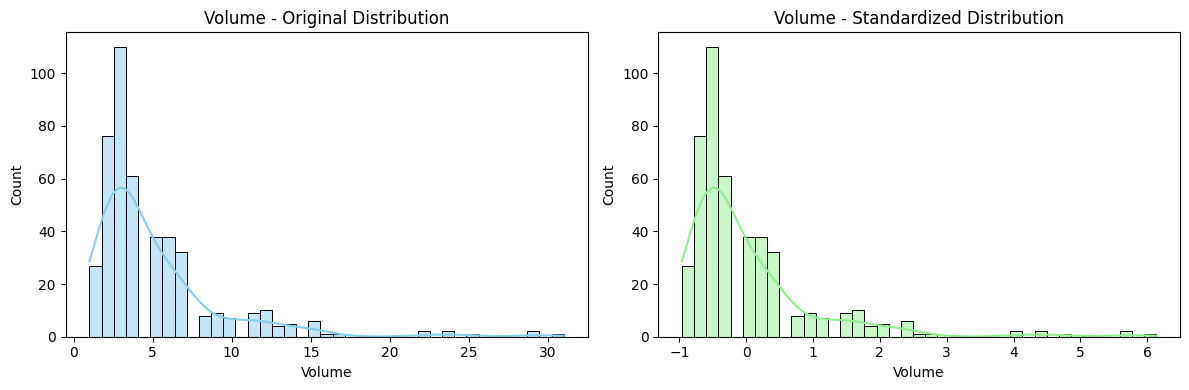

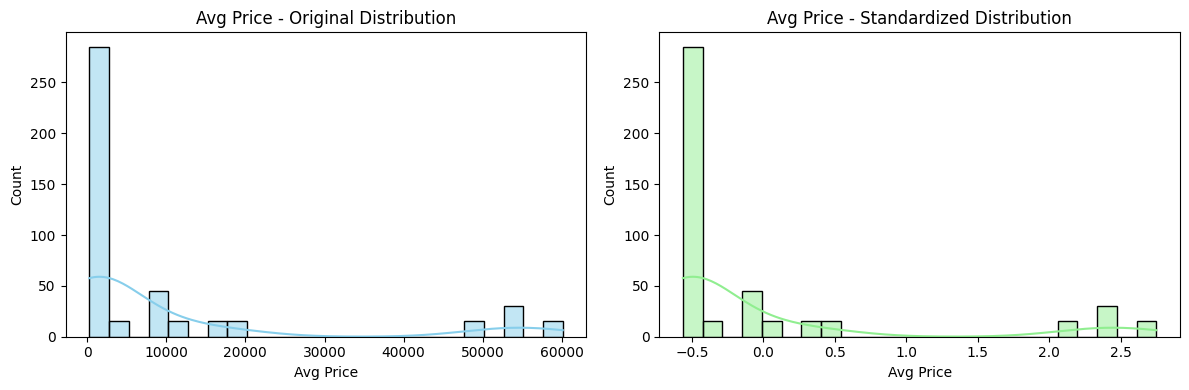

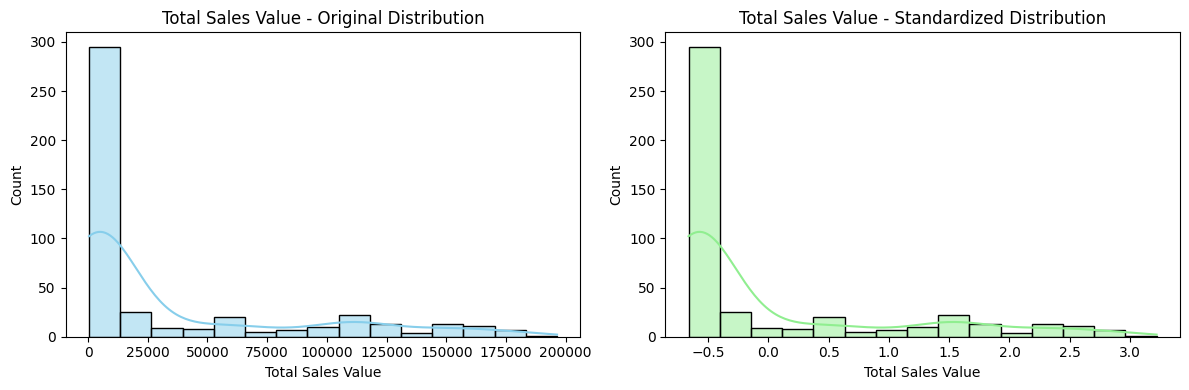

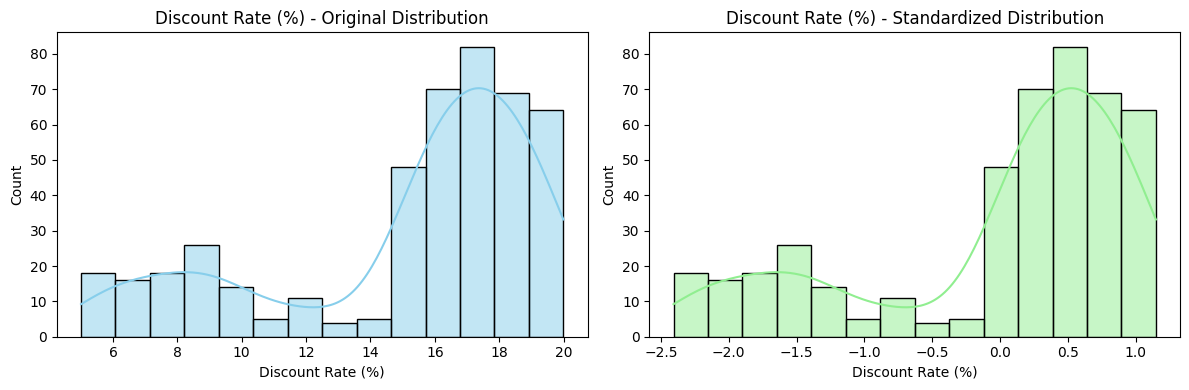

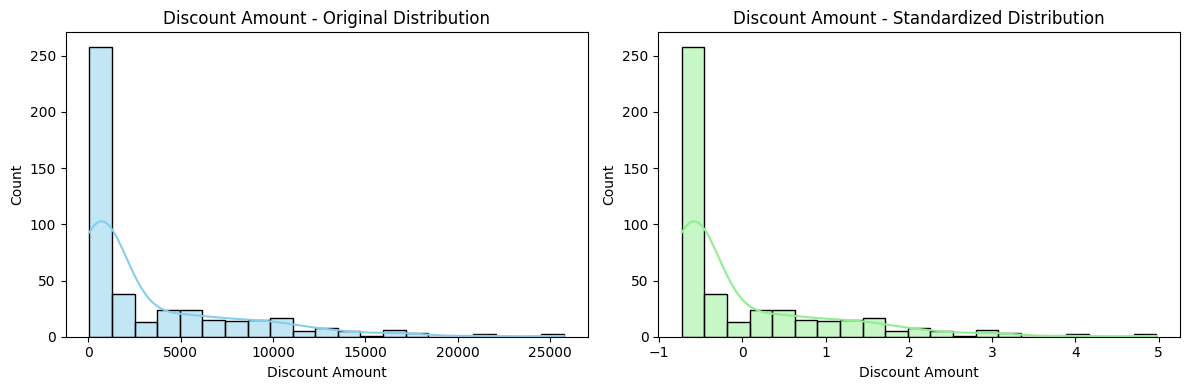

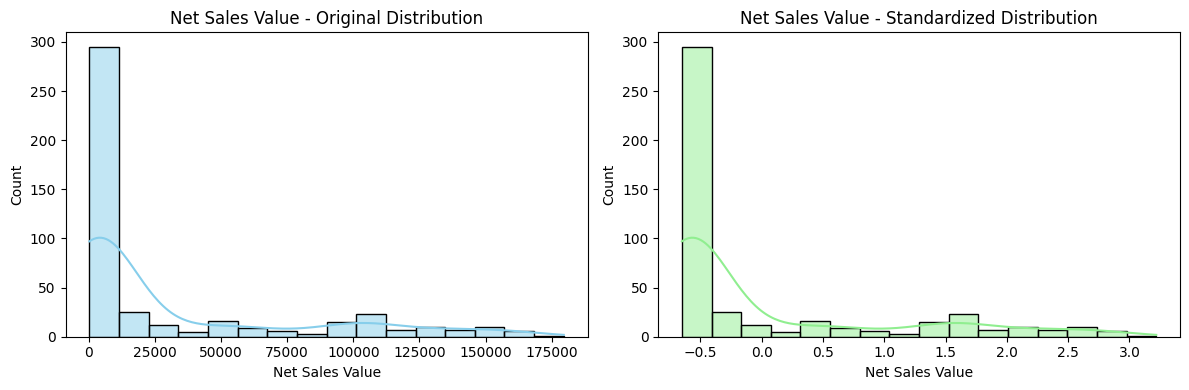

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Standardize numerical columns
df_standardized = df.copy()
for col in numerical_cols:
    df_standardized[col] = zscore(df[col])

# Plot side-by-side comparison
for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # Before standardization
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} - Original Distribution')

    # After standardization
    plt.subplot(1, 2, 2)
    sns.histplot(df_standardized[col], kde=True, color='lightgreen')
    plt.title(f'{col} - Standardized Distribution')

    plt.tight_layout()
    plt.show()


# Before and After Standardization Comparison

The histograms above show the distribution of each numerical column before and after applying z-score normalization.

- **Original data** retains the original units and scales.
- **Standardized data** has a mean of 0 and a standard deviation of 1.

After standardization:
- All features are centered around zero.
- The shapes of the distributions remain the same (standardization doesn’t change distribution shape, only scale).
- Now, features are ready for use in ML models that are sensitive to scale.


In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


One-hot encoding transforms categories into numeric binary features. This is essential for ML models that can't interpret text directly.

###  Conclusion:

- We analyzed and visualized numerical and categorical columns using descriptive statistics, histograms, and boxplots.
- We found skewness in some columns and outliers via boxplots.
- Categorical variables were visualized using bar charts for insights.
- Standardization made data suitable for ML models with z-score normalization.
- Categorical columns were transformed using one-hot encoding to enable ML processing.

These preprocessing steps are crucial for building robust machine learning models.
